### Task-3: Iris Flower Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('IRIS.csv', encoding='unicode_escape')

In [3]:
# Dataset First Look
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Data Pre-processing

In [4]:
#Checking the null values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#importing libraries used for encoding

from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le = LabelEncoder()

In [8]:
for i in iris.columns:
    if is_numeric_dtype(iris[i]):
        continue
    else:
        iris[i] = le.fit_transform(iris[i])

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Data Pre-processing

C:\Users\saibh\AppData\Local\Temp\ipykernel_26876\3938393498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'species', data = iris, palette = "Set2")


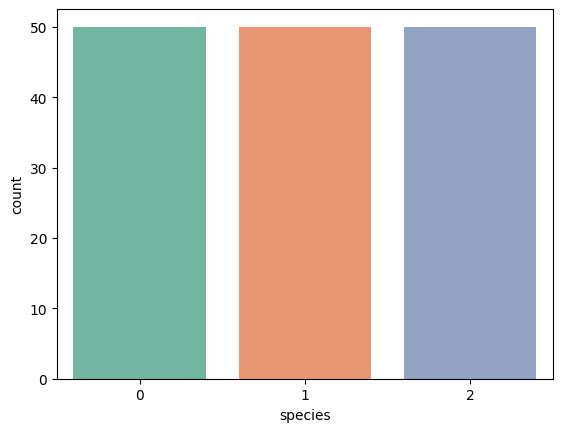

In [10]:
#Created a bar chart to see the count of species category

sns.countplot(x = 'species', data = iris, palette = "Set2")
plt.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

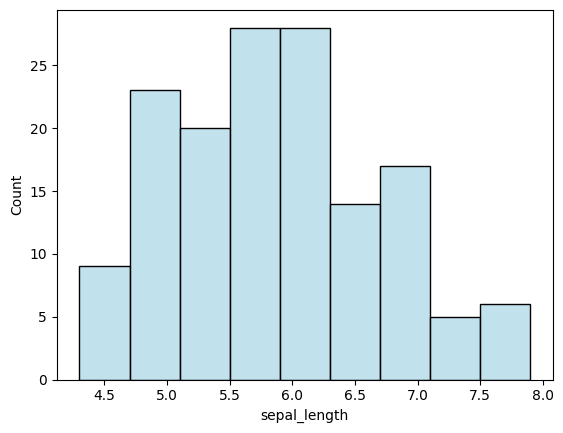

In [19]:
#Built a histogram for sepal_length data to know the relation

sns.histplot(data = iris , x = iris.sepal_length ,color = 'lightblue')

<Axes: xlabel='sepal_width', ylabel='Count'>

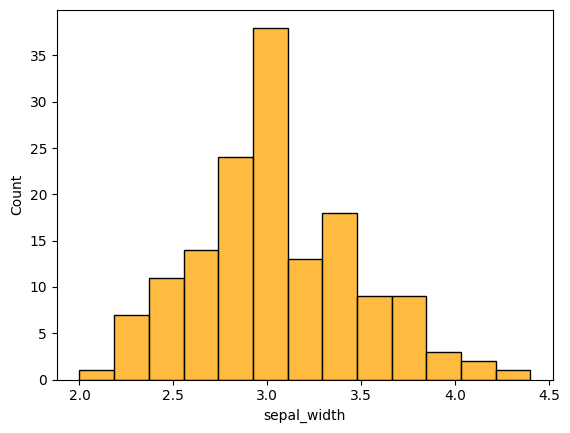

In [12]:
#Built a histogram for sepal_width data to know the relation

sns.histplot(data = iris , x = iris.sepal_width ,color = 'orange')

<Axes: xlabel='petal_length', ylabel='Count'>

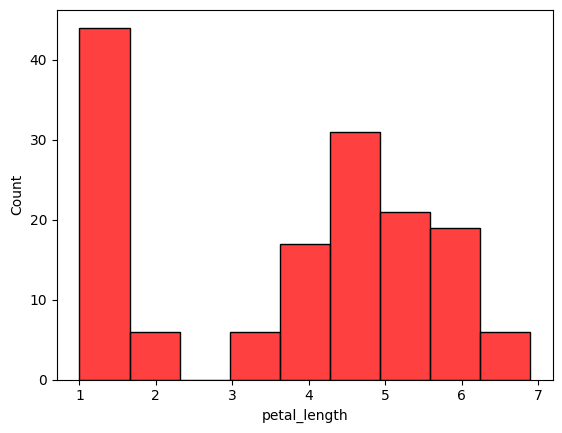

In [13]:
#Built a histogram for petal_length data to know the relation

sns.histplot(data = iris , x = iris.petal_length ,color = 'red')
     

<Axes: xlabel='petal_width', ylabel='Count'>

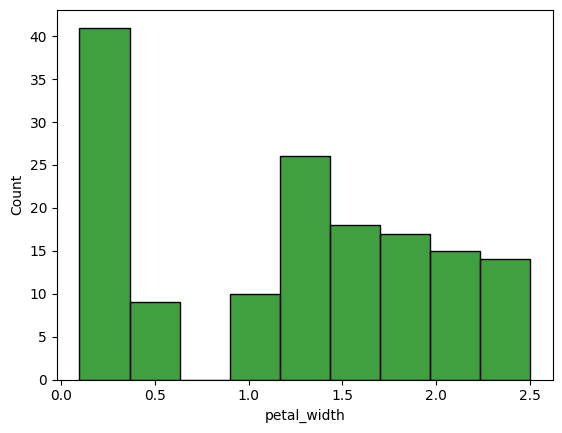

In [20]:
#Built a histogram for petal_width data to know the relation

sns.histplot(data = iris , x = iris.petal_width ,color = 'green')
     

<Axes: >

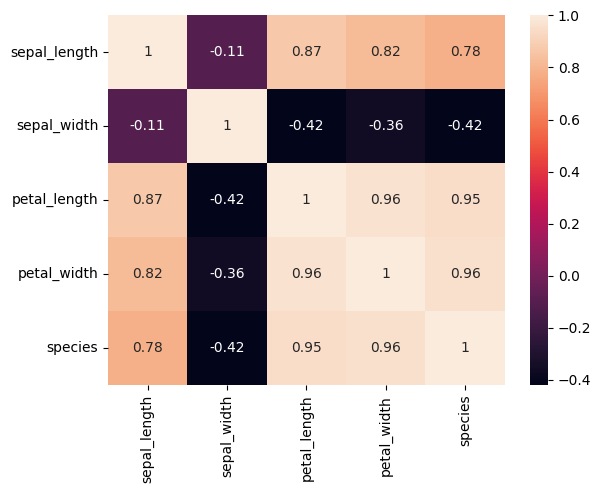

In [21]:
#Created a heatmap to see the feature-wise correlation in the dataset

corr = iris.corr()
sns.heatmap(corr, annot = True)
     

### Data Preparation

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [24]:
# Assigning the predictor and target variable

X = iris.drop(['species'],axis=1)
y = iris.species

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)    

### Model Building

In [26]:
# Importing essential libraries for model building

from sklearn.linear_model import LogisticRegression

In [27]:
# Building machine learning model and training them

Model = LogisticRegression()
Model.fit(X_train,y_train)


LogisticRegression()

In [28]:
#Evaluating the model to verify the accuracy

print("Score for Train data",Model.score(X_train, y_train))
print("Score for Test data",Model.score(X_test, y_test))

Score for Train data 0.9809523809523809
Score for Test data 0.9333333333333333


In [29]:
# Importing essential libraries for Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [30]:
# Building machine learning model and training them

Model2 = RandomForestClassifier(n_estimators = 300 , random_state=100)
Model2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=100)

In [31]:
#Evaluating the model to verify the accuracy

print("Score for Train data",Model2.score(X_train, y_train))
print("Score for Test data",Model2.score(X_test, y_test))

Score for Train data 1.0
Score for Test data 0.9333333333333333


In [32]:
# knn k-nearest neigbours
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# Building machine learning model and training them

Model3 = KNeighborsClassifier()
Model3.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
#Evaluating the model to verify the accuracy

print("Score for Train data",Model3.score(X_train, y_train))
print("Score for Test data",Model3.score(X_test, y_test))

Score for Train data 0.9714285714285714
Score for Test data 0.9777777777777777


### Model Testing

In [35]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
# Custom test inputs (as requested)
data = {
    'sepal_length': [5.2, 6.7, 7.2],
    'sepal_width': [3.6, 3.1, 3.0],
    'petal_length': [1.4, 4.7, 5.8],
    'petal_width': [0.2, 1.5, 1.6]
}
trail = pd.DataFrame(data)
     

In [47]:
# Predict the movie rating by entered data
result = Model.predict(trail)

# Display all predicted results
for i, res in enumerate(result, start=1):
    print(f"Result {i} - Predicted Rating: {res}")


Result 1 - Predicted Rating: 0
Result 2 - Predicted Rating: 1
Result 3 - Predicted Rating: 2
